# **Title of Project**

MOVIE TICKET PRICING

## **Objective**

To Predict The Ticket Price

## **Data Source**

KAGGLE

## **Import Library**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

## **Import Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Vidushirocks/Movie_Ticket_Pricing/main/cinemaTicket_Ref.csv')

## **Describe Data**

In [3]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328639,05-05-2018,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,05-05-2018,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,05-05-2018,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,05-05-2018,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,05-05-2018,5,2,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [5]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235180,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


## **Data Visualization**

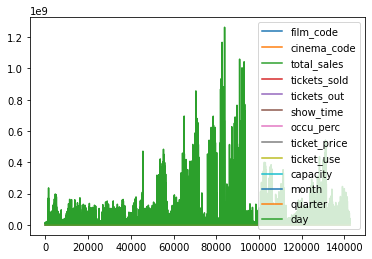

In [6]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ffabc71d0>,
      dtype=object)

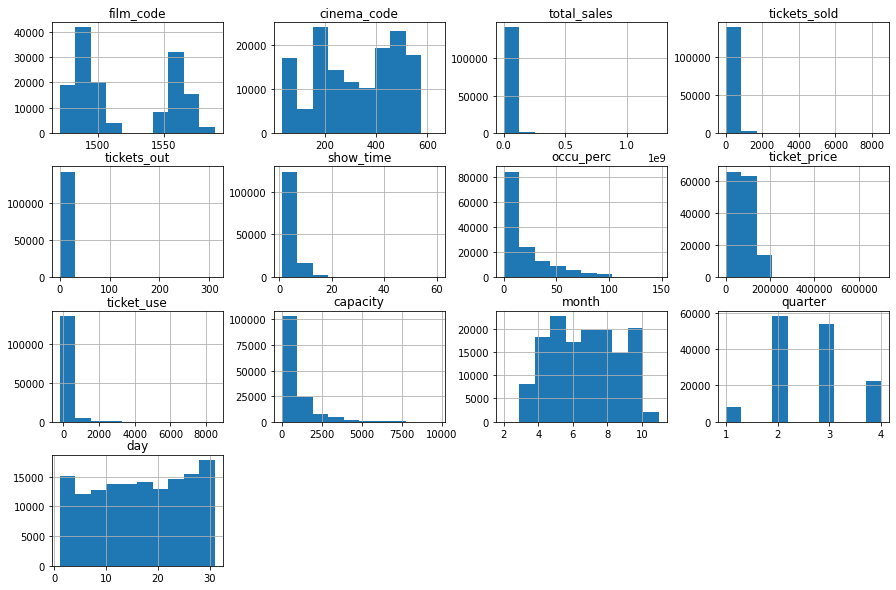

In [7]:
df.hist(bins=10, figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ffa52a2d0>]],
      dtype=object)

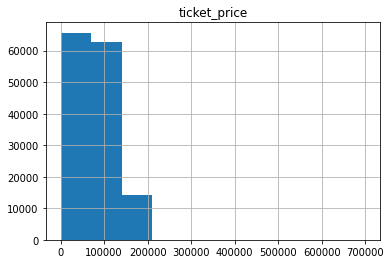

In [8]:
df.hist(column='ticket_price')

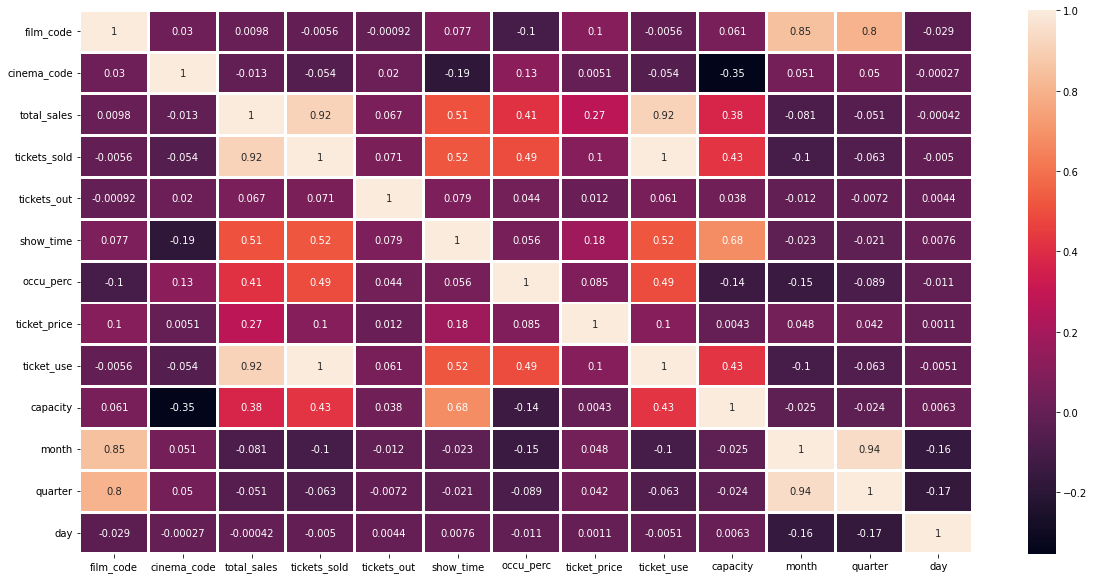

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, linewidths=2,linecolor="white")
plt.show()

In [10]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
film_code,1.00,0.03,0.01,-0.01,-0.00,0.08,-0.10,0.10,-0.01,0.06,0.85,0.80,-0.03
cinema_code,0.03,1.00,-0.01,-0.05,0.02,-0.19,0.13,0.01,-0.05,-0.35,0.05,0.05,-0.00
total_sales,0.01,-0.01,1.00,0.92,0.07,0.51,0.41,0.27,0.92,0.38,-0.08,-0.05,-0.00
tickets_sold,-0.01,-0.05,0.92,1.00,0.07,0.52,0.49,0.10,1.00,0.43,-0.10,-0.06,-0.01
tickets_out,-0.00,0.02,0.07,0.07,1.00,0.08,0.04,0.01,0.06,0.04,-0.01,-0.01,0.00
show_time,0.08,-0.19,0.51,0.52,0.08,1.00,0.06,0.18,0.52,0.68,-0.02,-0.02,0.01
occu_perc,-0.10,0.13,0.41,0.49,0.04,0.06,1.00,0.08,0.49,-0.14,-0.15,-0.09,-0.01
ticket_price,0.10,0.01,0.27,0.10,0.01,0.18,0.08,1.00,0.10,0.00,0.05,0.04,0.00
ticket_use,-0.01,-0.05,0.92,1.00,0.06,0.52,0.49,0.10,1.00,0.43,-0.10,-0.06,-0.01
capacity,0.06,-0.35,0.38,0.43,0.04,0.68,-0.14,0.00,0.43,1.00,-0.03,-0.02,0.01


## **Data Preprocessing**

In [11]:
df= df.dropna(how='all')
print(df)
df= df.dropna(how='all', axis=1)
print(df)

        film_code  cinema_code  total_sales  ...  month  quarter  day
0            1492          304      3900000  ...      5        2    5
1            1492          352      3360000  ...      5        2    5
2            1492          489      2560000  ...      5        2    5
3            1492          429      1200000  ...      5        2    5
4            1492          524      1200000  ...      5        2    5
...           ...          ...          ...  ...    ...      ...  ...
142519       1569          495      1320000  ...     11        4    4
142520       1569          474      1200000  ...     11        4    4
142521       1569          524      1060000  ...     11        4    4
142522       1569          529       600000  ...     11        4    4
142523       1569          486       250000  ...     11        4    4

[142524 rows x 14 columns]
        film_code  cinema_code  total_sales  ...  month  quarter  day
0            1492          304      3900000  ...      5       

In [12]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [14]:
df.fillna(999, inplace=True)

In [15]:
df = df.drop(['cinema_code','occu_perc','tickets_out','capacity','month','quarter','day'], axis=1)
df.shape

(142524, 7)

In [16]:
df.head(5)

,film_code,total_sales,tickets_sold,show_time,ticket_price,ticket_use,date
0,1492,3900000,26,4,150000.0,26,05-05-2018
1,1492,3360000,42,5,80000.0,42,05-05-2018
2,1492,2560000,32,4,80000.0,32,05-05-2018
3,1492,1200000,12,1,100000.0,12,05-05-2018
4,1492,1200000,15,3,80000.0,15,05-05-2018


## **Define Target Variable (y) and Feature Variables (X)**

In [17]:
df['ticket_price'].astype(np.int64)
df['ticket_price'] = df['ticket_price'].fillna(0).astype(np.int64)

In [18]:
X = df[['total_sales','show_time','film_code','ticket_use','tickets_sold']]

In [19]:
X.shape

(142524, 5)

In [20]:
y = df['ticket_price']
y.shape

(142524,)

## **Train Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)
X_train
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42757, 5), (99767, 5), (42757,), (99767,))

## **Modeling**

In [23]:
pip install transformers

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from transformers import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

## **Model Evaluation**

In [25]:
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=252)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
model=pipe.fit(X_train, y_train)

pipe.score(X_test, y_test) 

0.96

## **Prediction**

In [26]:
prediction = model.predict(X_test)

In [27]:
print("accuracy score: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy score: 96.0%


In [28]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[12  0]
 [ 1 12]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.92      0.96        13

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



In [29]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, prediction)

0.04

In [30]:
prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0])

## **Explaination**

When we imported the dataset and visualise it using correlation, we found that there are certain columns who have weak correlation with our variable so we drop them.
As our var has float values we need to convert it into int before defining our target variable y. Then we splitted our dataset into train and test subsets.
I used Logistic Regression and created my model using pipeline to compute the mean and standard deviation on a training set so as to be able to later re-apply the same transformation on the testing set. As our model was reaching the max iteration before fiting the model.
We found that the model has an accuracy of 96 %